## 1: Intro, libraries, and EDA

For my ML project, I wanted to find an interesting and easily accessible data set. This is the red wine quality set from Kaggle; I've seen this used before, and it's provides a lot of intersting features to review and work with. I think with its number of features, and being an intriguing topic, this will make a great project.

Data Set: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import statistics
import re
import string
import math

In [2]:
#import data
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#review data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity : {min: 4.6 , max: 15.9 }


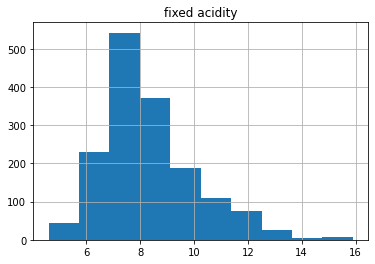

volatile acidity : {min: 0.12 , max: 1.58 }


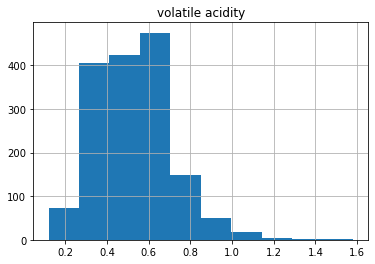

citric acid : {min: 0.0 , max: 1.0 }


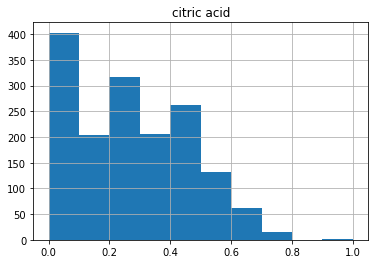

residual sugar : {min: 0.9 , max: 15.5 }


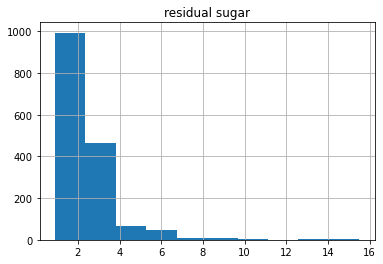

chlorides : {min: 0.012 , max: 0.611 }


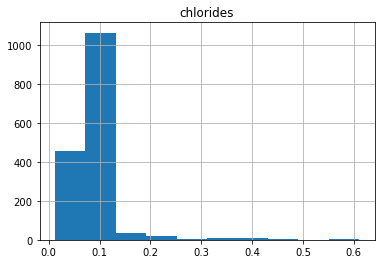

free sulfur dioxide : {min: 1.0 , max: 72.0 }


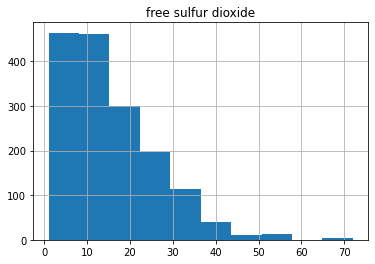

total sulfur dioxide : {min: 6.0 , max: 289.0 }


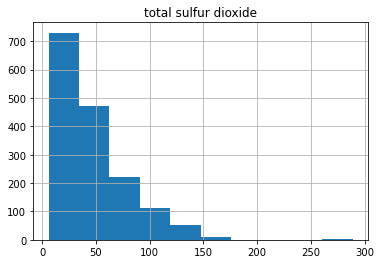

density : {min: 0.99007 , max: 1.00369 }


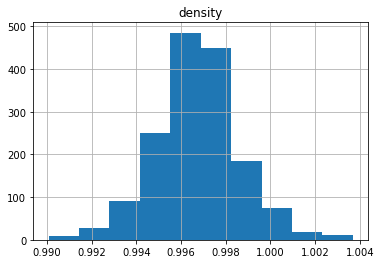

pH : {min: 2.74 , max: 4.01 }


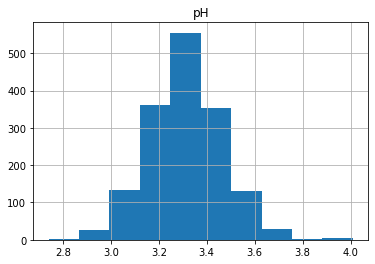

sulphates : {min: 0.33 , max: 2.0 }


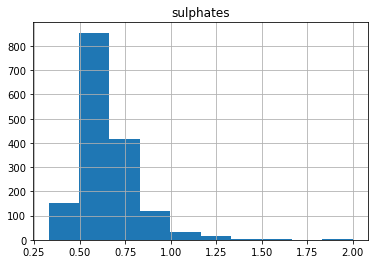

alcohol : {min: 8.4 , max: 14.9 }


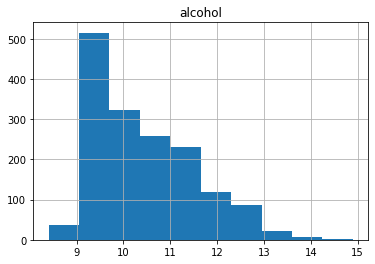

quality : {min: 3 , max: 8 }


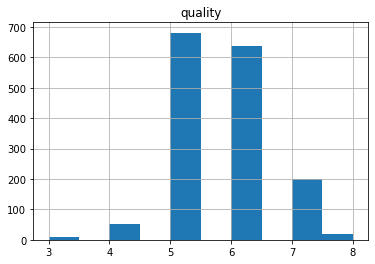

In [4]:
#histograms of features
for x in ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']:
    print(x, ": {min:", min(data[x]), ", max:", max(data[x]), "}")
    data[x].hist()
    plt.title(x)
    plt.show()

These histograms really give good context for our features. Several seem to have guassian distribution (pH, quality), or an assymetrical curve (fixed acidity, volatile acidity, sulphates), or a log scale (residual sugar, chlorides, total sulfur dioxide). These seem like they'll be good features to work with.

## 2: Model Building

Now that we've reviewed our data, we'll get started on preparing our data and building a model.

In [5]:
data.x_train, data.x_test, data.y_train, data.y_test = train_test_split(data, data['quality'], test_size = 0.3)
data.x_train

/var/folders/8g/sl1y903151z6d44bh4jxcln40000gn/T/ipykernel_1265/2761459272.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.x_train, data.x_test, data.y_train, data.y_test = train_test_split(data, data['quality'], test_size = 0.3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
308,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
1494,6.4,0.310,0.09,1.40,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,7
483,10.6,0.360,0.60,2.20,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
1035,10.1,0.370,0.34,2.40,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7
...,...,...,...,...,...,...,...,...,...,...,...,...
937,12.0,0.630,0.50,1.40,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4
1175,6.5,0.610,0.00,2.20,0.095,48.0,59.0,0.99541,3.61,0.70,11.5,6
555,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
850,9.3,0.430,0.44,1.90,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5


In [12]:
#group the items into our components
def assign_topics(nmf_model, new_data):
    newMat = nmf_model.transform(new_data)
    
    preds = []
    for i in range(len(new_data)):
        preds.append(pd.DataFrame(newMat).loc[i].idxmax())
        
    #return a data series of predictions
    return pd.Series(preds)

def build_nmf(train_data, n_components):
    #build an nmf model and train it using our features
    nmf_model = NMF(n_components, init = 'nndsvda', max_iter = 3000)
    topic_mat = nmf_model.fit_transform(train_data)
    #make a data frame for the components
    components_df = pd.DataFrame(nmf_model.components_, columns=train_data.columns)
    #determine quality for each group
    
    preds = assign_topics(nmf_model, train_data)
    preds = preds.reindex(train_data.index)
    topic_qual = []
    for i in range(n_components):
        if len(train_data[preds == i]) > 0:
            avequal = train_data[preds == i].quality.mean()
            topic_qual.append(avequal)
        else:
            topic_qual.append('')
    
    #return the nmf model, and the components frame from the models
    return nmf_model, components_df, topic_qual

#turn the topics into categories
def assign_quality(preds, topic_qual):
    tt = []
    for x in preds:
        tt.append(topic_qual[x])   
        
    return tt

def run_all_steps(n_components, train_data, test_data):
    #run all the steps
    nmf_model, components_df, topic_qual = build_nmf(train_data, n_components)
    preds = assign_topics(nmf_model, test_data)
    return assign_quality(preds, topic_qual)
    
#finds the accuracy rate of the prediction
def rsme(Y_true, Y_pred):
    return math.sqrt(np.square(np.subtract(Y_true, Y_pred)).mean())

In [13]:
n_components = 3
#turn words into features
nmf_model, components_df, topic_qual = build_nmf(data.x_train, n_components)

## 3: Results Evaluation

Now that we've constructed out nmf model, we can use it to group our wines, and then assign a quality for each based in this grouping. We'll be using the mean squared error to evaluation our tests.

In [14]:
preds = assign_topics(nmf_model, data.x_test)
data.y_test = assign_quality(preds, topic_qual)
rsme(data.x_test['quality'], data.y_test)

0.8533755928284618

In [23]:
trials = []
for i in range(1, 11):
    n_components = i
    rezz = run_all_steps(n_components, data.x_train, data.x_test)
    trials.append(rsme(data.x_test['quality'], pd.Series(rezz)))

/Users/ben/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 3000 reached. Increase it to improve convergence.
  warnings.warn(


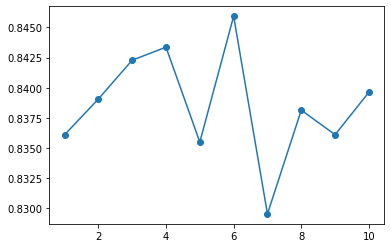

In [24]:
plt.scatter(range(1, 11), trials)
plt.plot(range(1, 11), trials)
plt.show()

We do see that the number of components does affect the rsme, but it's notable that the variance is very small, so impact is fairly negligible.

As a comparison, I want to look at the error if I just use the average quality of all the wines.

In [25]:
qualave = [data.x_train['quality'].mean()] * len(data.y_test)
rsme(data.x_test['quality'], qualave)

0.8450721612616641

Unfortunately, we see that this is basically in line with our quality rates with our grouping. This is the most important learning here, showing that our work with the matrix factorization did not improve our ability to assign a quality for these wines.

## 4: Supervized Learning Comparison

Since we were unsuccessful with our unsupervized learning, I wanted to attempt this same problem with a supervized learning approach. I wanted to make a quick try at this with a random forest classifier.

In [26]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(data.x_train, data.x_train['quality'])
test_clf = clf.predict(data.x_test)
rsme(data.x_test['quality'], test_clf)

0.5143766454003655

## 5: Conclusion

We do see a significantly stronger result with our random forest classifier, and I think there are several reasons for this. First, I think that this format of rich features in a dense matrix is quite different from the data sets we used for our recommendation systems, and I think the methods we've learned are better suited for those types of problems. Second, while I understand a lot of the concepts of what we've been doing, I think I need more learning and practice developing unsupervized learning algorithms. But I do feel satisfied that I already have a lot more knowledge in this field than I did a month ago.

For further improvement, I would look at other unsupervized machine learning techniques, and I would look at ways that I can better apply my nmf_model, because we do know that mathematically it is learning something about our features array that can be useful.

In [ ]:
Github repository: 